In [92]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import accuracy_score ,confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier,  LocalOutlierFactor 
from sklearn.decomposition import PCA 
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
import warnings
warnings.filterwarnings('ignore') 



In [93]:
data = pd.read_csv(r"C:\Users\shaur\OneDrive\Desktop\0 Machine Learning\heart.csv")

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [59]:
print(len(data))  
print('Data Shape',data.shape)

1025
Data Shape (1025, 14)


In [60]:
describe = data.describe() 
print(describe.T)

           count        mean        std    min    25%    50%    75%    max
age       1025.0   54.434146   9.072290   29.0   48.0   56.0   61.0   77.0
sex       1025.0    0.695610   0.460373    0.0    0.0    1.0    1.0    1.0
cp        1025.0    0.942439   1.029641    0.0    0.0    1.0    2.0    3.0
trestbps  1025.0  131.611707  17.516718   94.0  120.0  130.0  140.0  200.0
chol      1025.0  246.000000  51.592510  126.0  211.0  240.0  275.0  564.0
fbs       1025.0    0.149268   0.356527    0.0    0.0    0.0    0.0    1.0
restecg   1025.0    0.529756   0.527878    0.0    0.0    1.0    1.0    2.0
thalach   1025.0  149.114146  23.005724   71.0  132.0  152.0  166.0  202.0
exang     1025.0    0.336585   0.472772    0.0    0.0    0.0    1.0    1.0
oldpeak   1025.0    1.071512   1.175053    0.0    0.0    0.8    1.8    6.2
slope     1025.0    1.385366   0.617755    0.0    1.0    1.0    2.0    2.0
ca        1025.0    0.754146   1.030798    0.0    0.0    0.0    1.0    4.0
thal      1025.0    2.323

In [61]:
data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


target
1    526
0    499
Name: count, dtype: int64


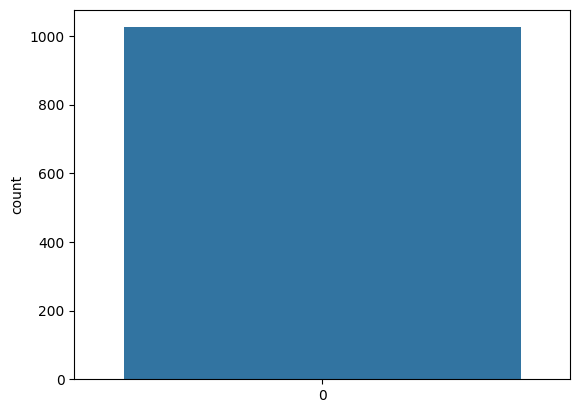

In [62]:
sns.countplot(data['target']) 
print(data.target.value_counts())

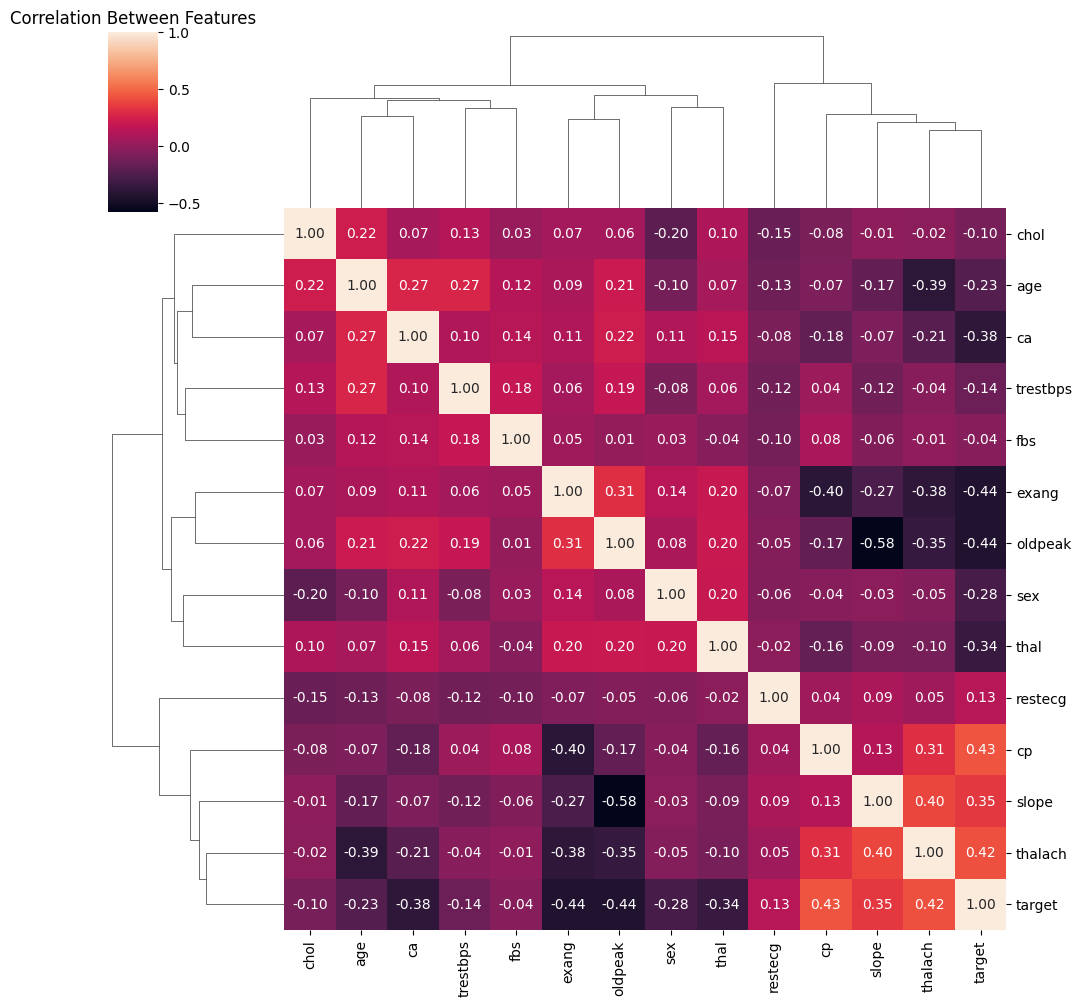

In [63]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

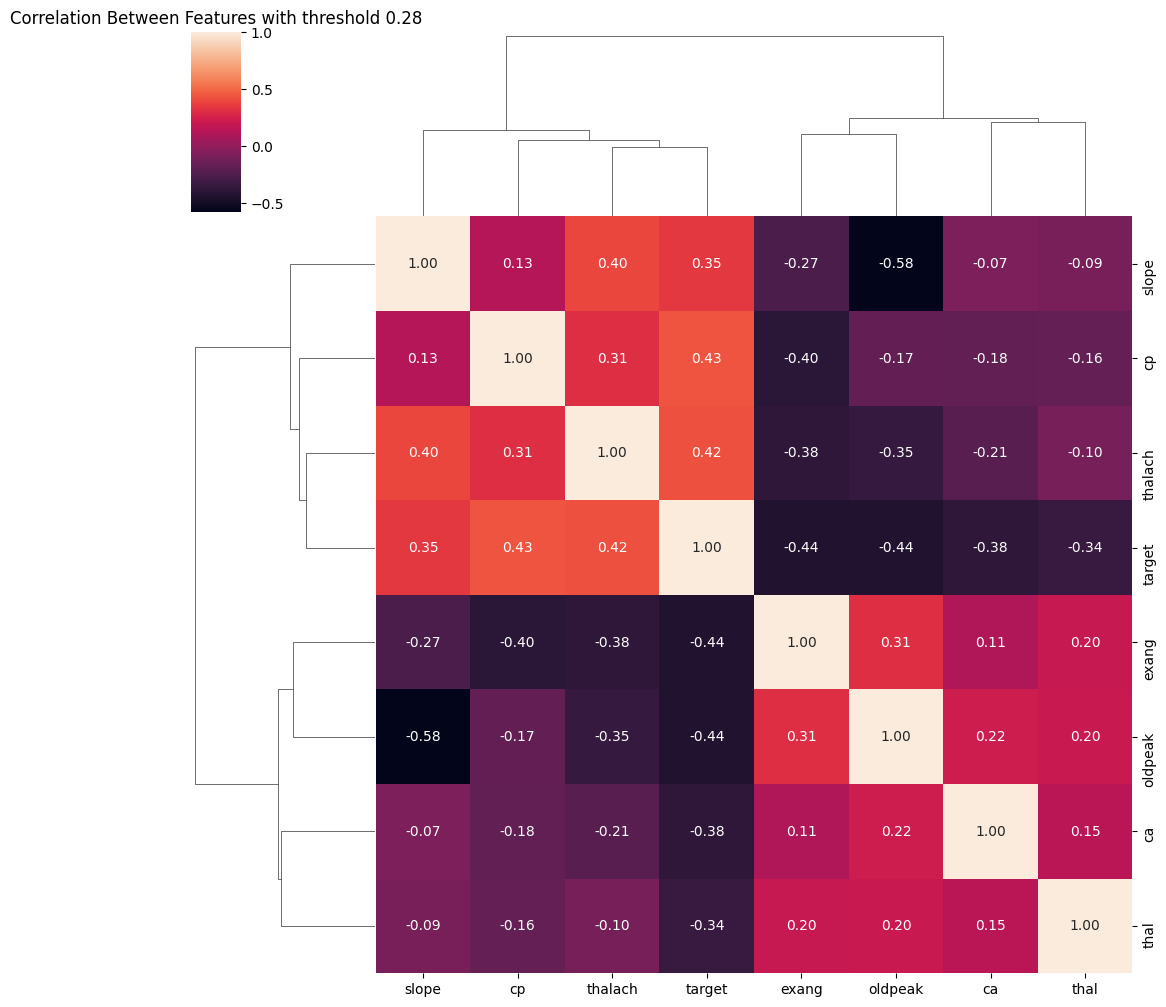

In [64]:
threshold = 0.28 

filtre = np.abs(corr_data['target']) > threshold 
corr_feature = corr_data.columns[filtre].tolist()


sns.clustermap(data[corr_feature].corr(),annot= True,fmt = '.2f')


plt.title('Correlation Between Features with threshold 0.28')
plt.show();

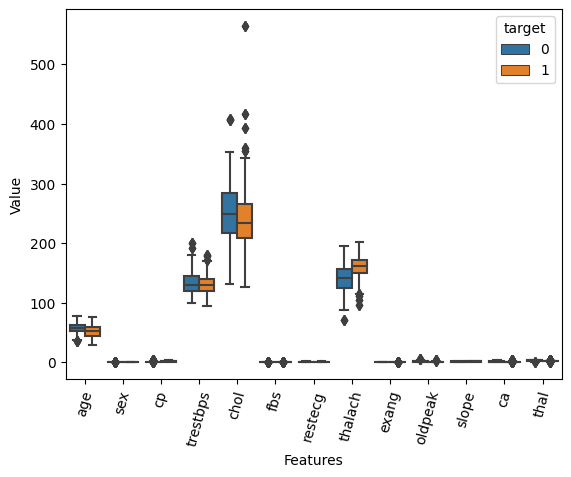

In [65]:
data_melted = pd.melt(data,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) 
plt.xticks(rotation=75) 
plt.show()

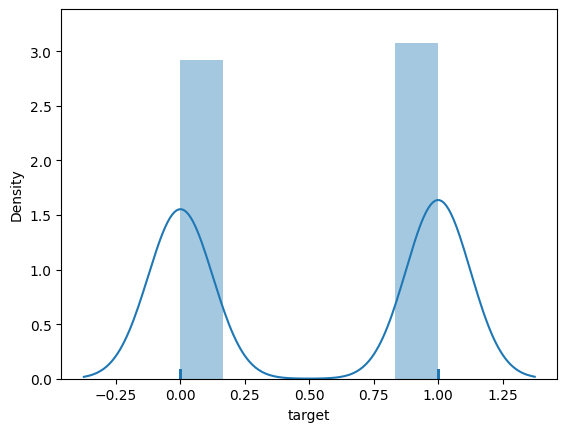

In [95]:
sns.distplot(data['target'],rug=True)
plt.show()

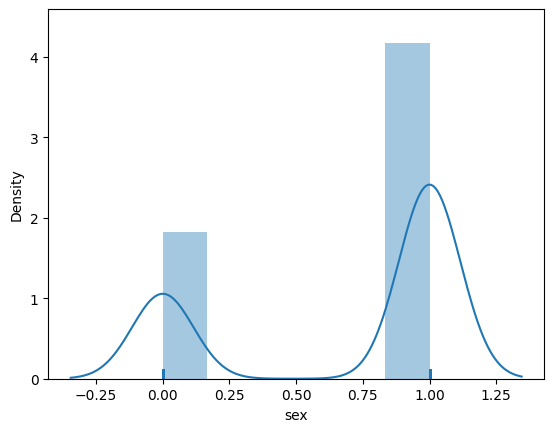

In [97]:
sns.distplot(data['sex'],rug=True)
plt.show()

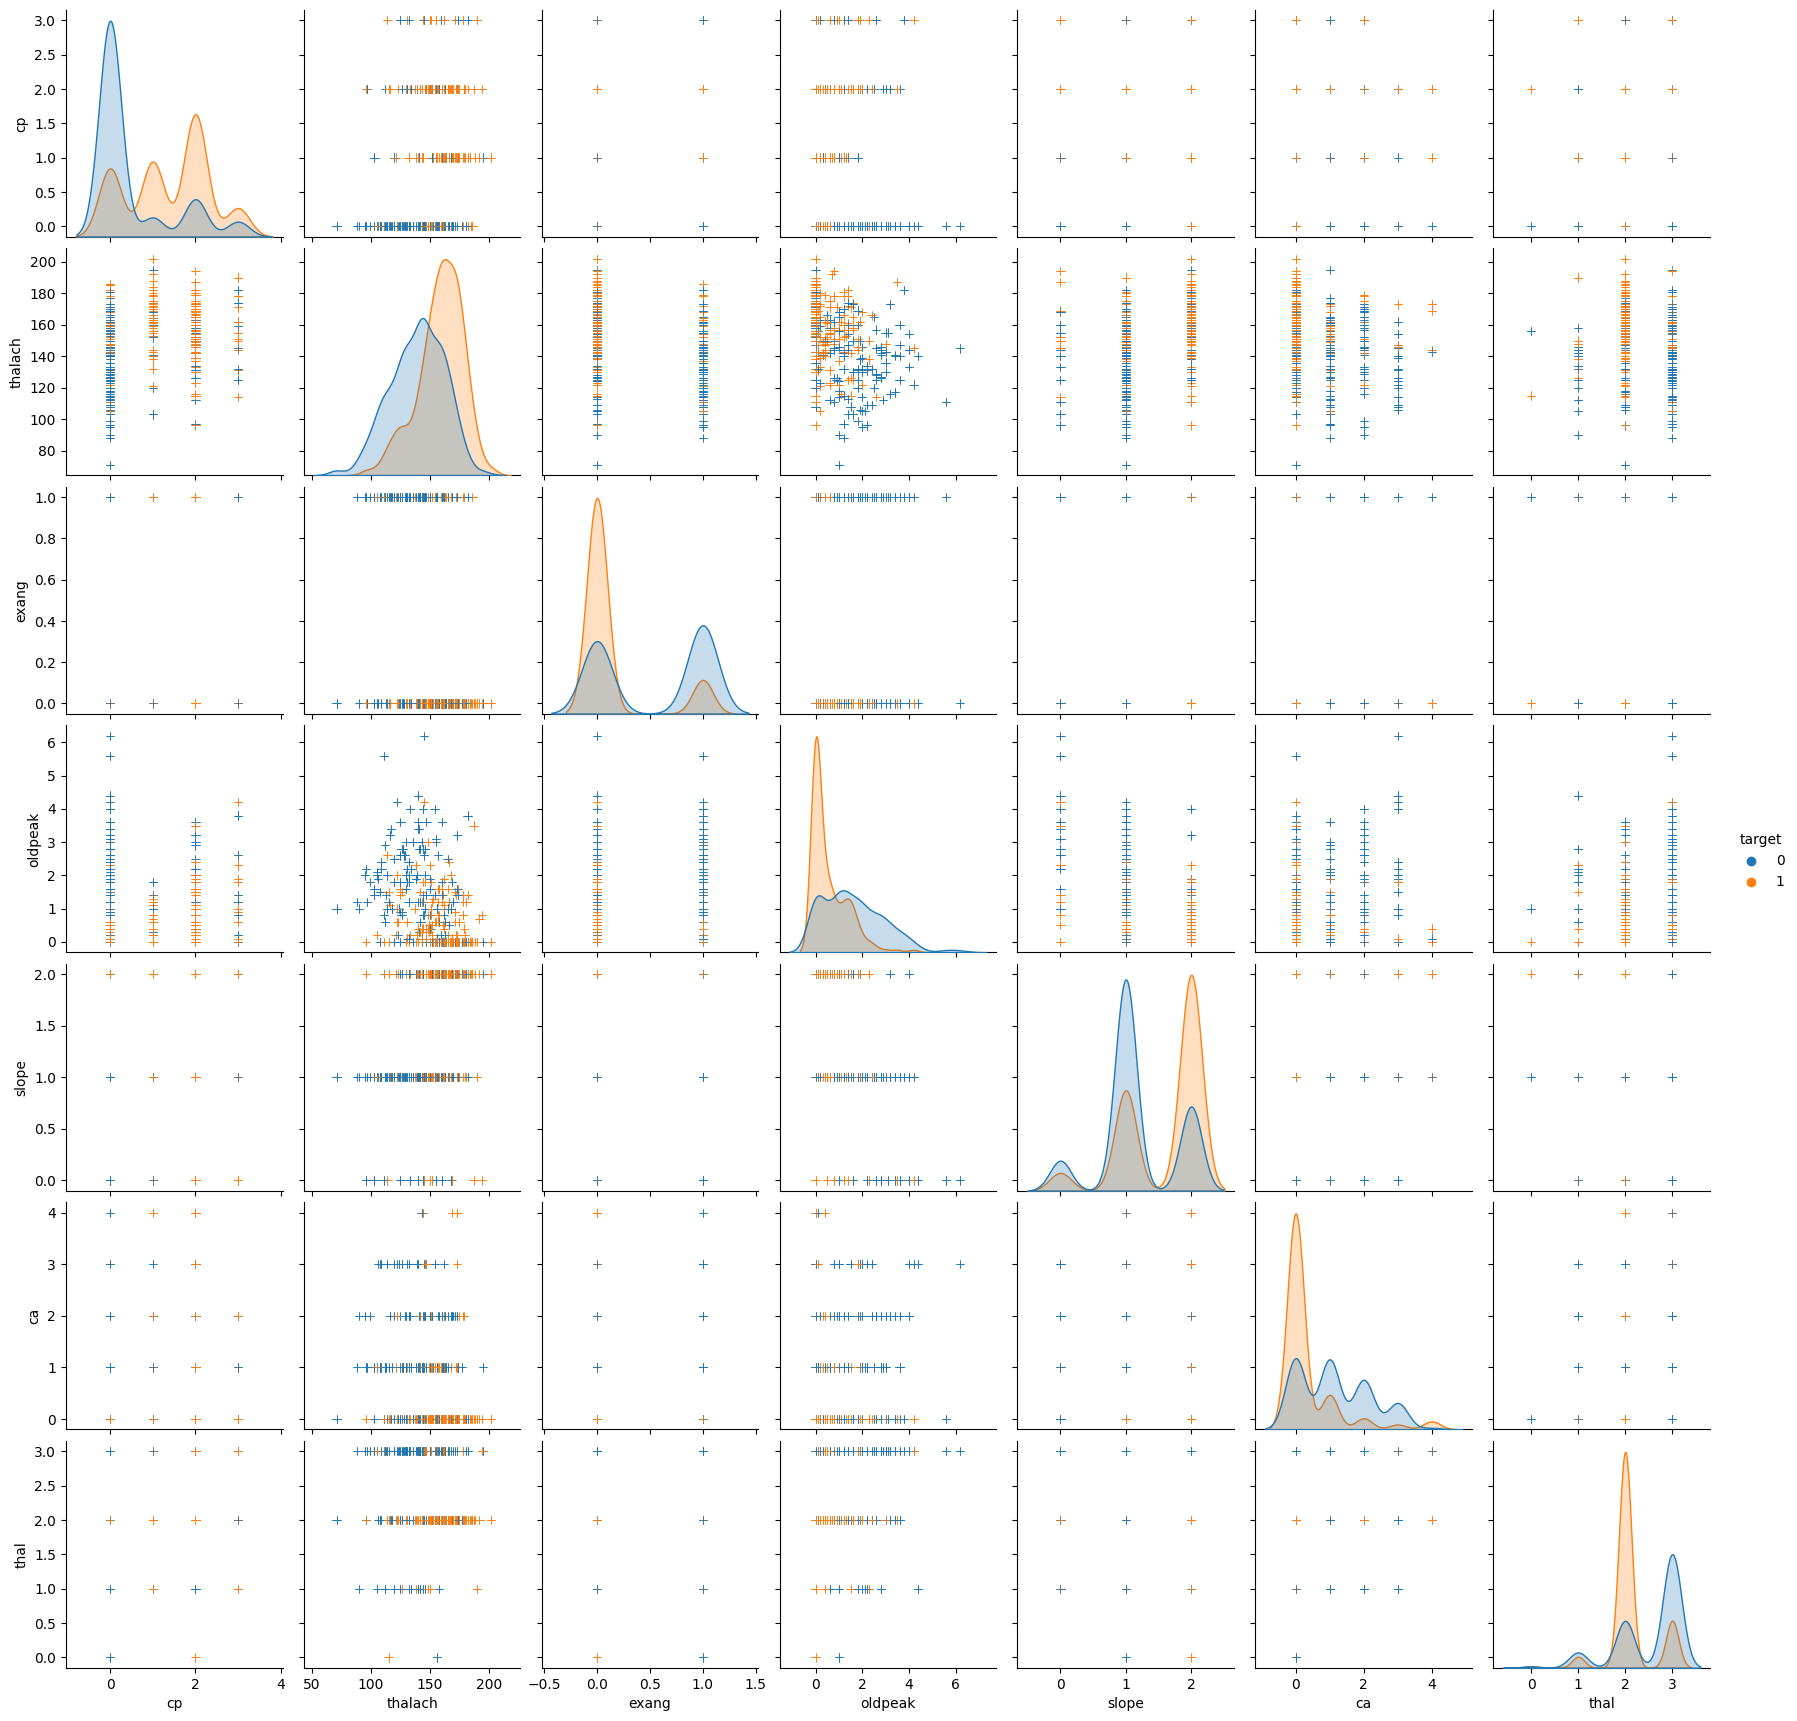

In [66]:

sns.pairplot(data[corr_feature],diag_kind='kde',markers='+',hue='target')
plt.show()


In [67]:
x = data.drop(['target'],axis=1) 
y = data.target
columns = x.columns.tolist() 

In [68]:
test_size = 0.2
x = RobustScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

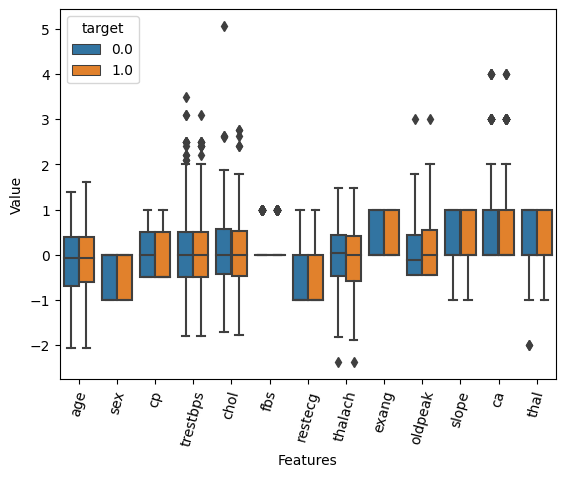

In [69]:

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) 
plt.xticks(rotation=75)
plt.show()

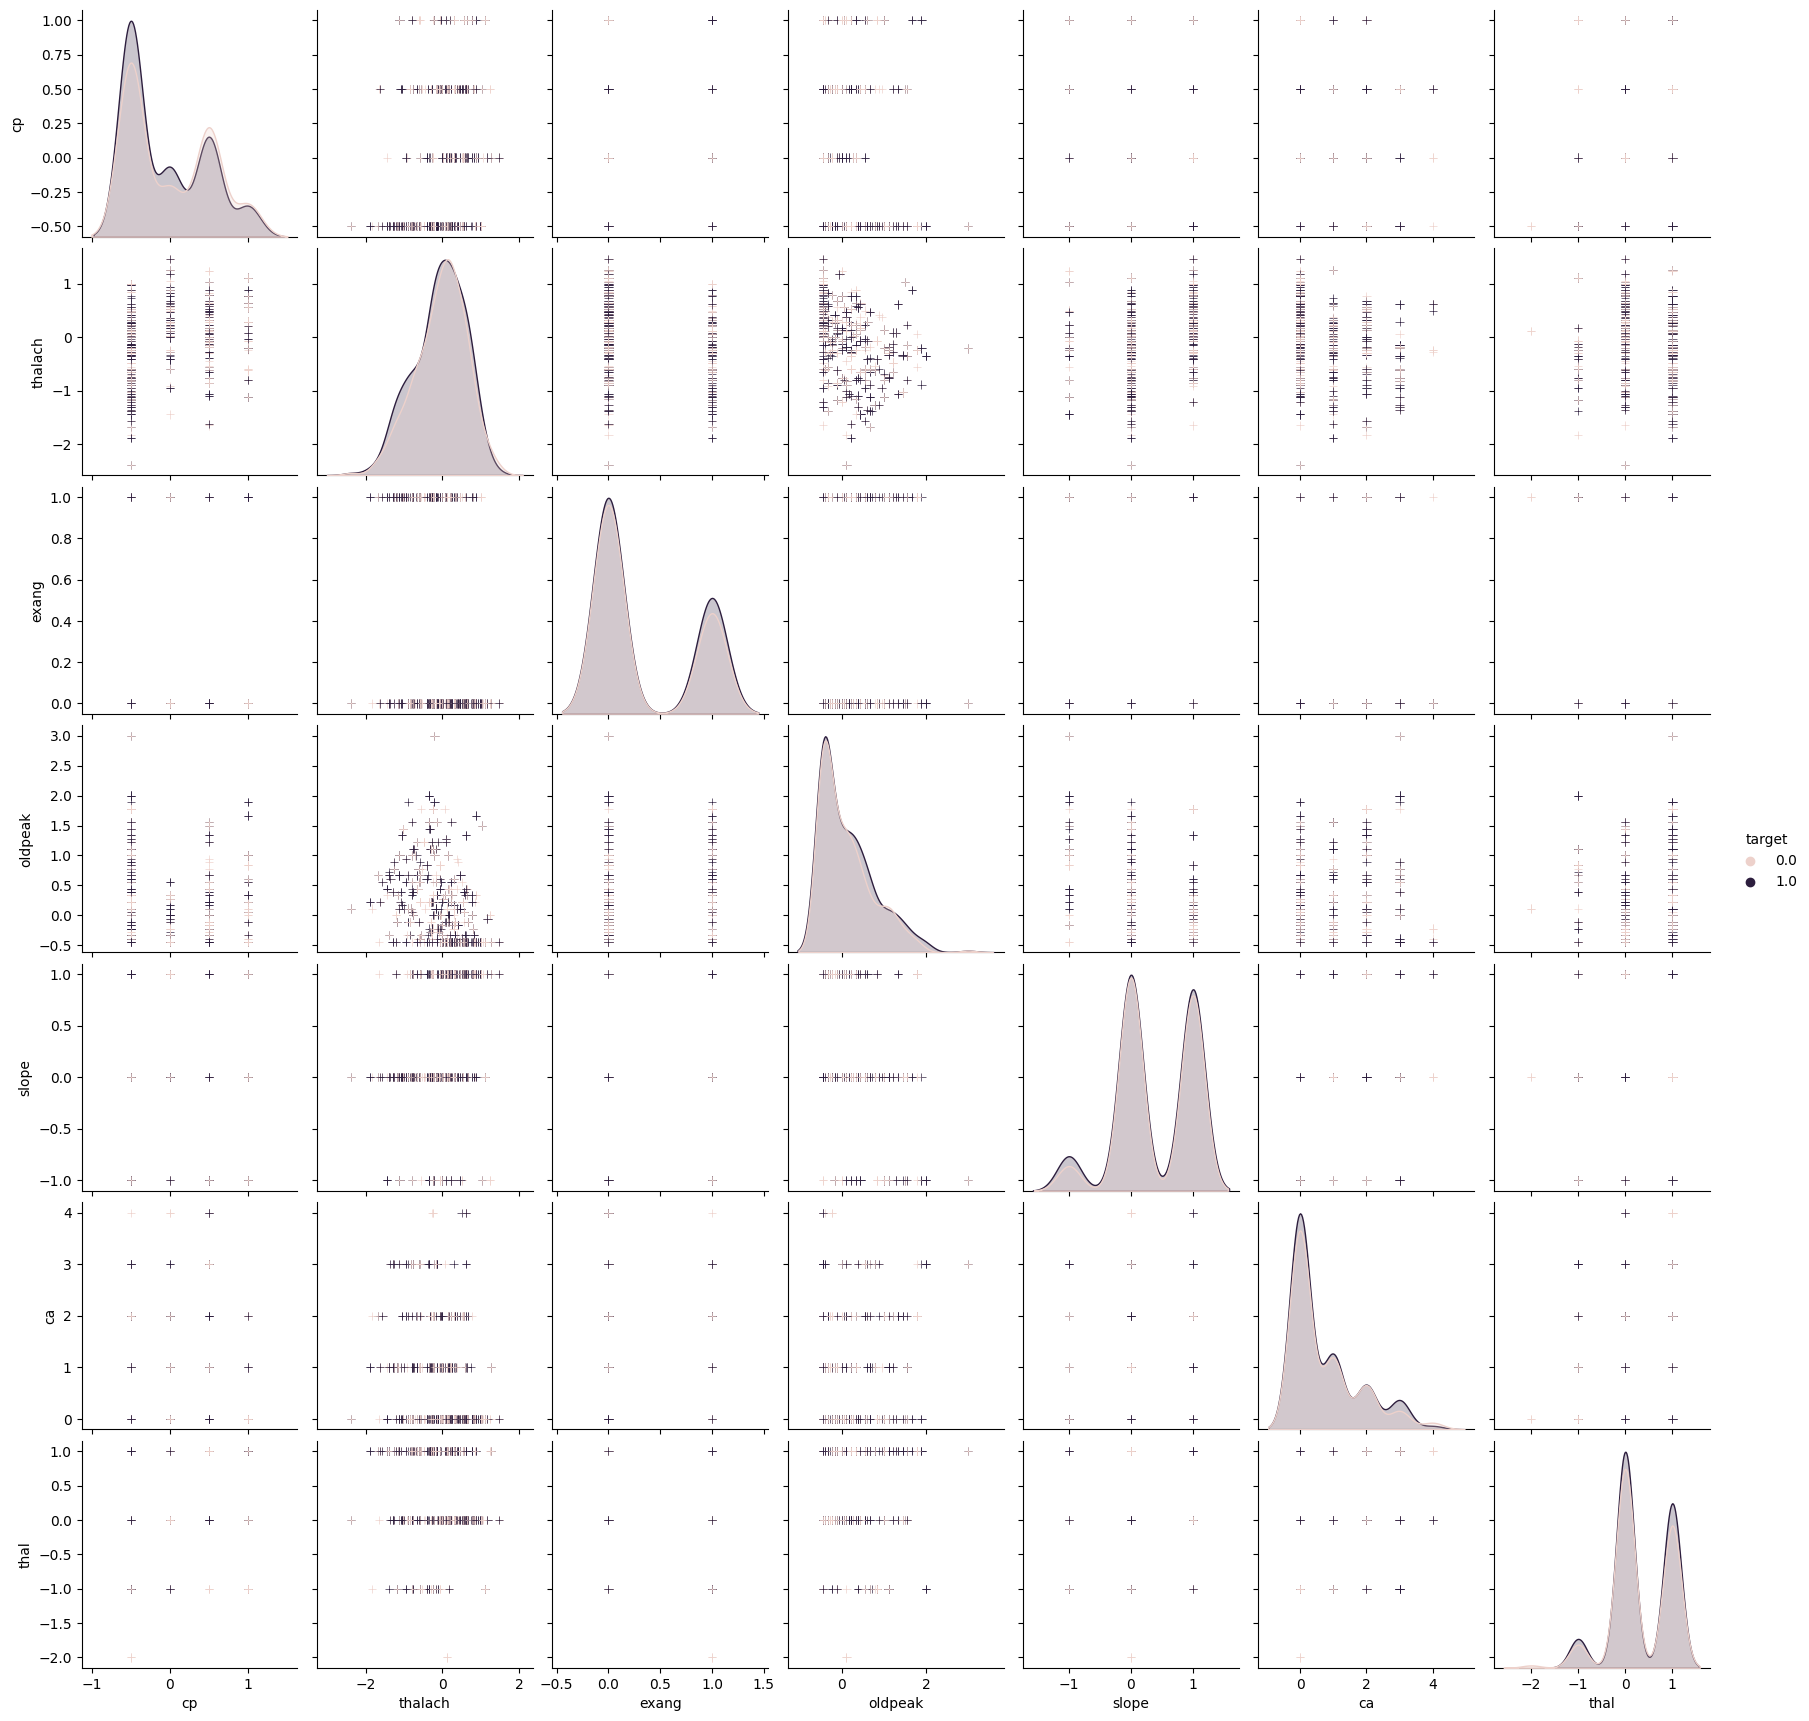

In [70]:

sns.pairplot(x_train_df[corr_feature],diag_kind='kde',markers='+',hue='target')
plt.show()

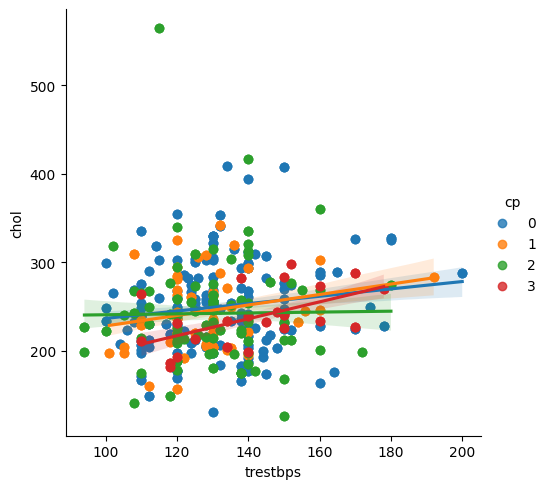

In [99]:
sns.lmplot(x="trestbps", y="chol",data=data,hue="cp")
plt.show()

In [71]:
random_state = 42
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train) 
y_predict = knn.predict(x_test) 
cm = confusion_matrix(y_test, y_predict) 
acc = accuracy_score(y_test, y_predict) 
score = knn.score(x_test, y_test) 

print("Score:",score)
print("CM:",cm)
print("Basic KNN Acc:",acc)

Score: 0.9658536585365853
CM: [[102   0]
 [  7  96]]
Basic KNN Acc: 0.9658536585365853


In [72]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,51)) 
    weight_options = ['uniform','distance'] 
    
    distance_options = [1,2]
    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) 

    knn =KNeighborsClassifier() 
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy') 
    grid.fit(x_train, y_train) 
    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) 
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

grid_knn_bestparam = KNN_best_parameters(x_train,x_test,y_train,y_test)


Best training score: 0.9951219512195122 with parametres: {'n_neighbors': 7, 'p': 2, 'weights': 'distance'}

Test Score: 1.0, Train Score: 1.0

CM Test: [[102   0]
 [  0 103]]
CM Train: [[397   0]
 [  0 423]]


In [73]:
knn_score=grid_knn_bestparam.score(x_test,y_test)

Text(0.5, 1.0, 'PCA: P1 Vs P2')

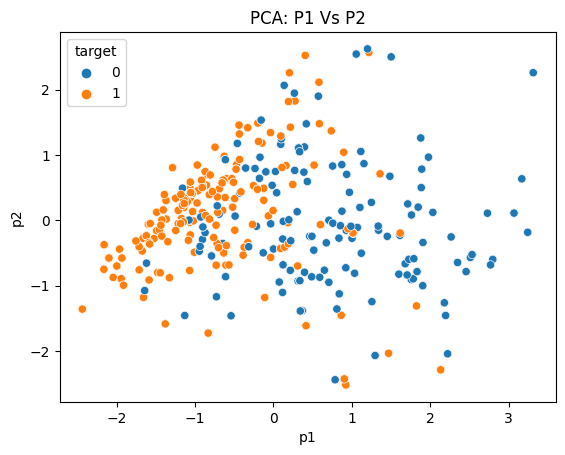

In [74]:
scaler = RobustScaler()
x_scaled = scaler.fit_transform(x)  

pca = PCA(n_components=2) 
pca.fit(x_scaled)
x_reduce_pca = pca.transform(x_scaled)  
pca_data =pd.DataFrame(x_reduce_pca,columns=['p1','p2']) 
pca_data['target'] = y 

sns.scatterplot(x='p1',y='p2',hue='target',data=pca_data) 
plt.title('PCA: P1 Vs P2')

In [75]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduce_pca,y,test_size=test_size,random_state=42)

grid_pca = KNN_best_parameters(x_train_pca, x_test_pca, y_train_pca, y_test_pca)



Best training score: 0.9878048780487806 with parametres: {'n_neighbors': 19, 'p': 2, 'weights': 'distance'}

Test Score: 0.9853658536585366, Train Score: 1.0

CM Test: [[102   0]
 [  3 100]]
CM Train: [[397   0]
 [  0 423]]


Text(0.5, 1.0, "2-Class classification (k = 19, weights = 'distance')")

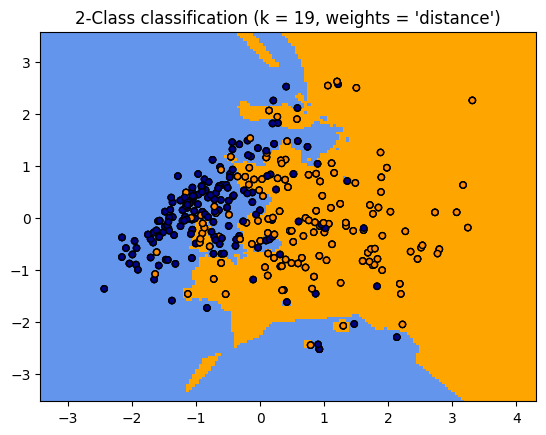

In [76]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 
X = x_reduce_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)


plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))


In [77]:
svc = SVC()
svc.fit(x_train,y_train)  #learning 
#SVM Test 

SVMscore_test = svc.score(x_test,y_test)
SVMscore_train = svc.score(x_train,y_train)
print ("SVM Test Accuracy:", svc.score(x_test,y_test))

print ("SVM Train Accuracy:", svc.score(x_train,y_train))

SVM Test Accuracy: 0.8682926829268293
SVM Train Accuracy: 0.9390243902439024


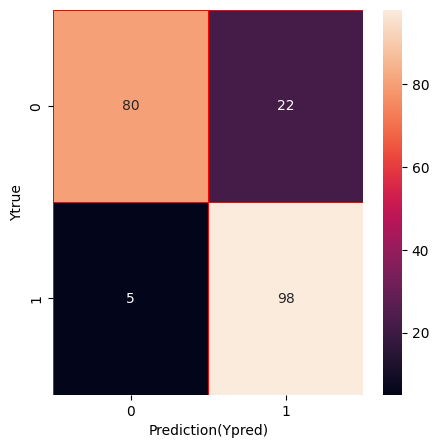

In [78]:
yprediciton2= svc.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [79]:
dt = DecisionTreeClassifier(random_state=random_state,max_depth=4)

dt.fit(x_train,y_train) #learning
#prediciton
DTCscore_test = dt.score(x_test,y_test)
DTCscore_train = dt.score(x_train,y_train)
print("Decision Tree Test Score: ",dt.score(x_test,y_test))
print("Decision Tree Train Score: ",dt.score(x_train,y_train))

Decision Tree Test Score:  0.8
Decision Tree Train Score:  0.8829268292682927


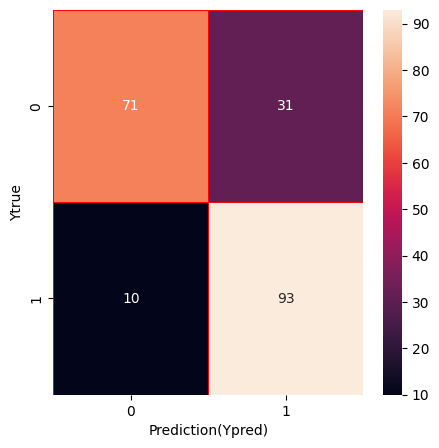

In [80]:
yprediciton2= dt.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

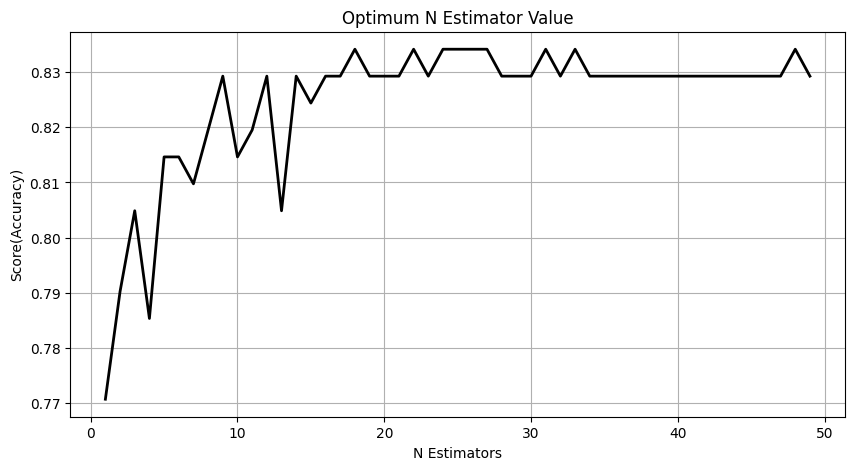

In [81]:
scores = []
for each in range(1,50):
    rf = RandomForestClassifier(n_estimators = each,random_state=random_state,max_depth=3)
    rf.fit(x_train,y_train)
    scores.append(rf.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,50),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

In [82]:
rf= RandomForestClassifier(n_estimators = 19, random_state=random_state,max_depth=3) #n_estimator = DT
rf.fit(x_train,y_train) # learning
RFCscore=rf.score(x_test,y_test)

print("Random Forest Test Score: ",rf.score(x_test,y_test))
print("Random Forest Train Score: ",rf.score(x_train,y_train))

Random Forest Test Score:  0.8292682926829268
Random Forest Train Score:  0.8902439024390244


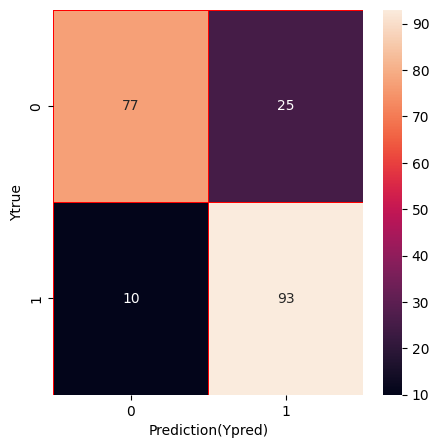

In [83]:
yprediciton2= rf.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

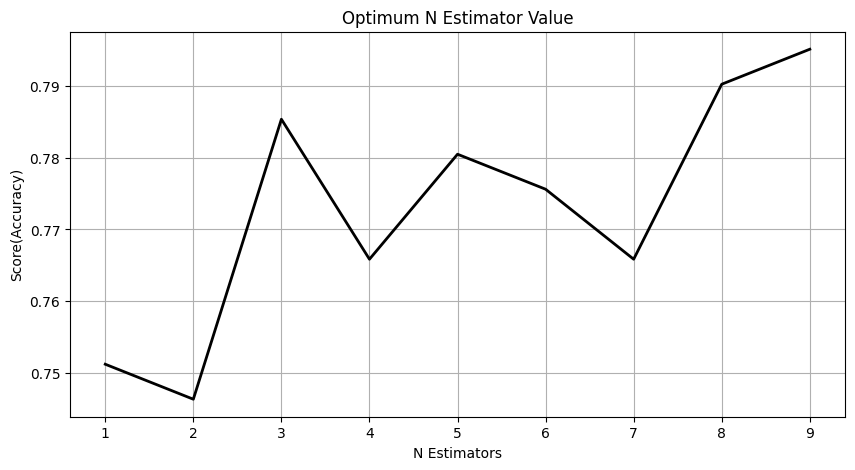

In [84]:
scores = []
for each in range(1,10):
    ada = AdaBoostClassifier(n_estimators = each,random_state=random_state)
    ada.fit(x_train,y_train)
    scores.append(ada.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(1,10),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

In [85]:
ada = AdaBoostClassifier(base_estimator=dt,n_estimators=3,random_state=random_state,learning_rate=0.001)
ada.fit(x_train,y_train) # learning
Adascore=ada.score(x_test,y_test)

print("AdaBoost Test Score: ",ada.score(x_test,y_test))
print("AdaBoost Train Score: ",ada.score(x_train,y_train))

AdaBoost Test Score:  0.8048780487804879
AdaBoost Train Score:  0.8853658536585366


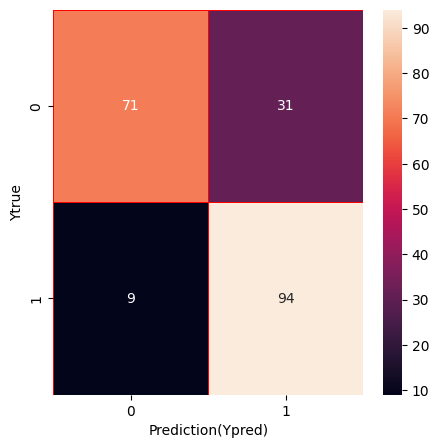

In [86]:
yprediciton2= ada.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [87]:
#LR with sklearn
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
print("LR Test Accuracy {}".format(LR.score(x_test,y_test)))
print("LR Train Accuracy {}".format(LR.score(x_train,y_train)))
LRscore =LR.score(x_test,y_test)

LR Test Accuracy 0.7853658536585366
LR Train Accuracy 0.8658536585365854


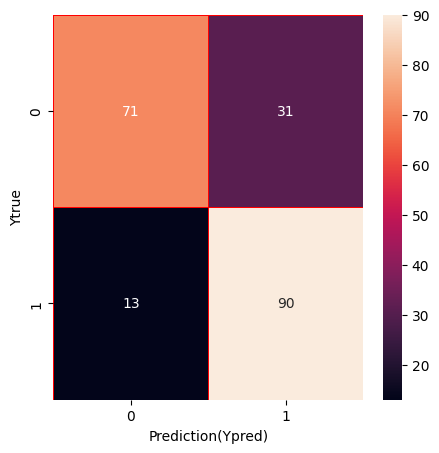

In [88]:
yprediciton2= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

In [89]:
v1 = VotingClassifier(estimators = [('svc',svc),('knn',knn),('dt',dt),('rf',rf),('ada',ada)])
v1.fit(x_train,y_train) # learning
vooting1=v1.score(x_test,y_test)

print("Voting C. Test Score: ",v1.score(x_test,y_test))
print("Voting C. Train Score: ",v1.score(x_train,y_train))

Voting C. Test Score:  0.8585365853658536
Voting C. Train Score:  0.9317073170731708


In [90]:
v2= VotingClassifier(estimators = [('svc',svc),('knn',knn),('rf',rf)])
v2.fit(x_train,y_train) # learning
vooting2=v2.score(x_test,y_test)

print("Voting C. Test Score: ",v2.score(x_test,y_test))
print("Voting C. Train Score: ",v2.score(x_train,y_train))

Voting C. Test Score:  0.8682926829268293
Voting C. Train Score:  0.947560975609756


In [91]:
scores=[SVMscore_test,DTCscore_test,knn_score,RFCscore,Adascore,LRscore,vooting1,vooting2]
AlgorthmsName=["SVM","Decision Tree","K-NN","Random Forest","Adaboost","Logistic Regression", 'Voting Classifier -1-','Voting Classifier-2-']

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)